1.DOWNLOAD THE DATA SET

In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

unzip:  cannot find or open /content/drive/MyDrive/Flowers-Dataset.zip, /content/drive/MyDrive/Flowers-Dataset.zip.zip or /content/drive/MyDrive/Flowers-Dataset.zip.ZIP.


2.IMAGE AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain=train_datagen.flow_from_directory('/content/Flowers-Dataset.zip',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

FileNotFoundError: ignored

In [ ]:
xtest=test_datagen.flow_from_directory('/content/flowers',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


3.CREAT MODEL

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense

4.ADD LAYERS 

In [ ]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

5.COMPILE THE MODEL

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.FIT THE MODEL

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch= len (xtrain),
                    epochs= 10,
                    validation_data=xtest,
                    validation_steps= len (xtest))

7. SAVE THE MODEL

In [ ]:
model.save('flowers.h5')

8.TESTING THE MODEL

testing 1

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

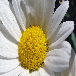

In [ ]:
img=image.load_img('/content/flowers/daisy/10140303196_b88d3d6cec.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'

testing 2

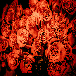

In [ ]:
img=image.load_img('/content/flowers/rose/10503217854_e66a804309.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'

testing 3

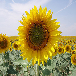

In [ ]:
img=image.load_img('/content/flowers/sunflower/1022552002_2b93faf9e7_n.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'